##KNN


In [449]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski',p = 2).fit(x_train,y_train)

In [450]:
y_hat = neigh.predict(x_test)


In [451]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_hat)

0.8315676339628435

In [452]:
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_hat)

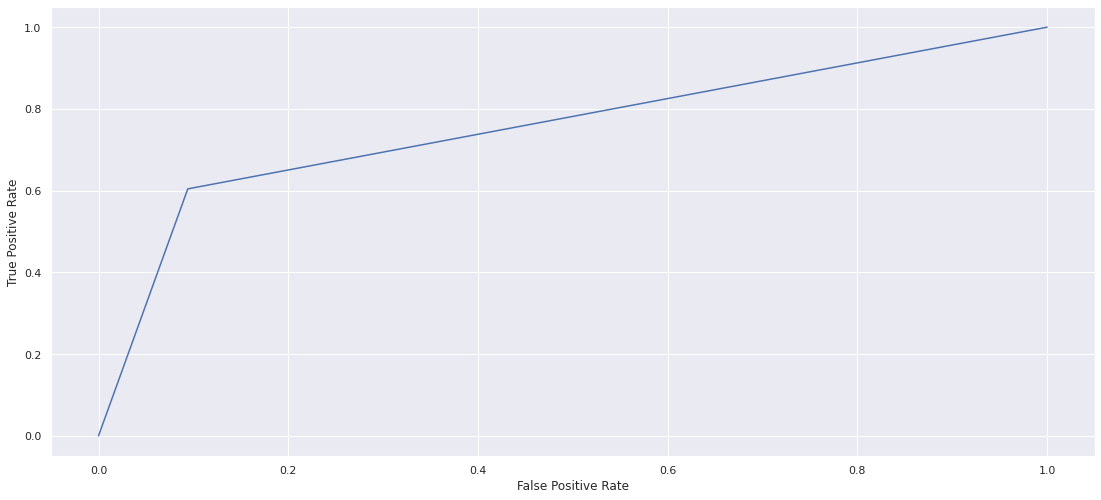

In [453]:
#create ROC curve
plt.plot(fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

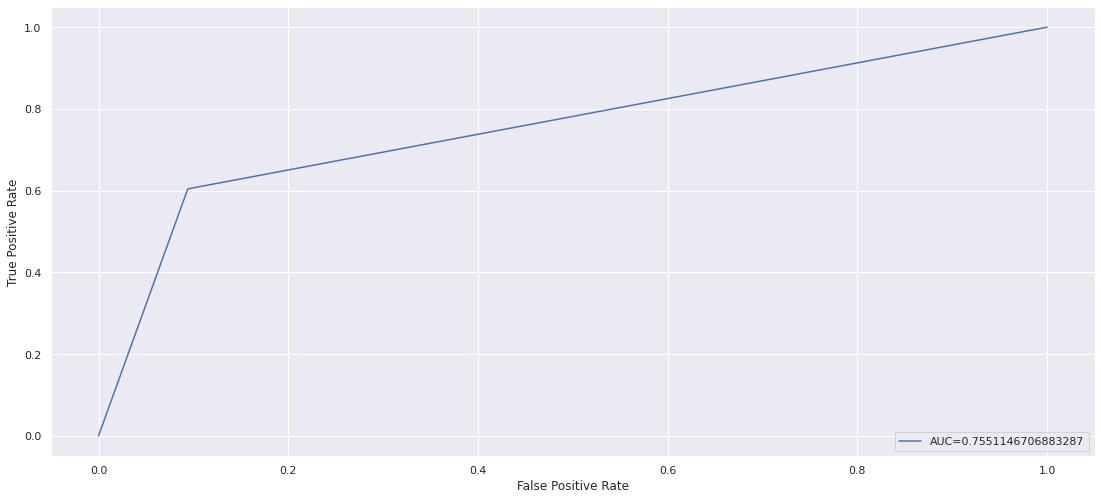

In [454]:
#define metrics

fpr1, tpr1, _ = metrics.roc_curve(y_test, y_hat)
auc = metrics.roc_auc_score(y_test, y_hat)

#create ROC curve
plt.plot(fpr1,tpr1,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

SELECTING BEST K VALUE

In [455]:
Ks=30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    y_hat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,y_hat)
    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
    
mean_acc

array([0.79471826, 0.81391064, 0.81943805, 0.82327652, 0.83156763,
       0.83494549, 0.83571319, 0.83786274, 0.83801628, 0.83893751,
       0.83755566, 0.84108706, 0.83878397, 0.83786274, 0.83893751,
       0.84062644, 0.84185475, 0.8412406 , 0.84077998, 0.8432366 ,
       0.84062644, 0.84277599, 0.8404729 , 0.84308306, 0.84062644,
       0.84216183, 0.8412406 , 0.84108706, 0.84077998])

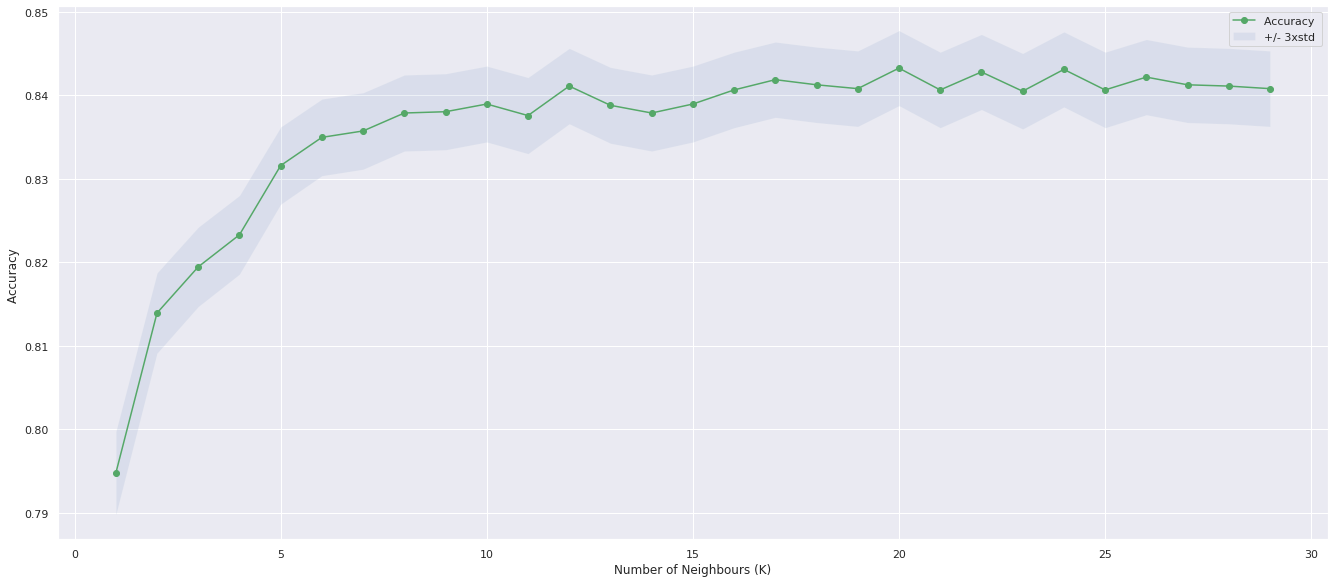

In [456]:
plt.plot(range(1,Ks),mean_acc,'g',marker='o')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [457]:
neigh = KNeighborsClassifier(n_neighbors=20).fit(x_train,y_train)
y_hat = neigh.predict(x_test)
metrics.accuracy_score(y_test,y_hat)

0.8432366037156457

In [467]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4908
           1       0.73      0.58      0.65      1605

    accuracy                           0.84      6513
   macro avg       0.80      0.75      0.77      6513
weighted avg       0.84      0.84      0.84      6513



In [458]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
confusion_matrix(y_test, y_hat)

array([[4564,  344],
       [ 677,  928]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


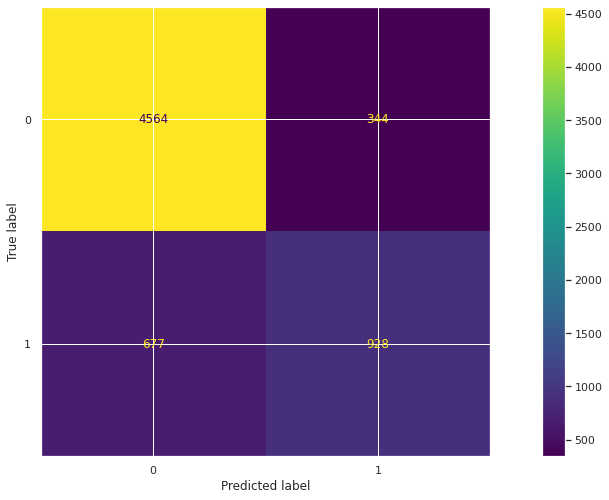

In [459]:
plot_confusion_matrix(neigh,x_test,y_test)
